In [1]:
import numpy as np # Линейная алгебра
import pandas as pd # Обработка и анализ данных
from wordcloud import WordCloud # Облако тегов
from wordcloud import STOPWORDS # Останавливает слова
import nltk # Символьная и статистическая обработка естественного языка
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt 
import seaborn as sns # Статистическая визуализация данных
import scikitplot as skplt
#simport scikitplot as skplt
from sklearn.model_selection import train_test_split # Разделяет массивы и матрицы в рандомные train and test subsets 

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 
# CountVectorizer - Преобразование коллекции текстовых документов в матрицу подсчета токенов
# TfidfTransformer - Преобразование матрицы отсчета в нормализованное представление tf или tf-idf

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #класс оценок
# Accuracy Score - вычисляет точность подмножества: набор меток, предсказанных для образца
# Confusion Matrix - матрица ошибок
# Classification Report - текстовый отчет, показывающий основные показатели классификации


#import methods
from sklearn.naive_bayes import MultinomialNB 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier
 

In [2]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jojo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jojo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import os
#print(os.listdir("../input"))

# Read Data 

In [4]:
df = pd.read_csv("email.csv", encoding = 'latin-1')
# split into input (X) and output (Y) variables
X = df.iloc[:,0:1]
Y = df.iloc[:,1]


# Show Data

In [5]:
df.head(5)

,text,spam
0,Subject: christmas tree farm pictures\r\r\n,1
1,"Subject: vastar resources , inc .\r\r\ngary , ...",1
2,Subject: calpine daily gas nomination\r\r\n- c...,1
3,Subject: re : issue\r\r\nfyi - see note below ...,1
4,Subject: meter 7268 nov allocation\r\r\nfyi .\...,1


In [6]:
#df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
#df.columns = ['Label', 'Message']
df = df.rename(columns={"spam":"Label", "text":"Message"})
df.head()

,Message,Label
0,Subject: christmas tree farm pictures\r\r\n,1
1,"Subject: vastar resources , inc .\r\r\ngary , ...",1
2,Subject: calpine daily gas nomination\r\r\n- c...,1
3,Subject: re : issue\r\r\nfyi - see note below ...,1
4,Subject: meter 7268 nov allocation\r\r\nfyi .\...,1


In [7]:
# Pour Renommer les labels
df["Label"] = df.Label.map({0:'ham', 1:'spam'})

In [8]:
df.shape

(10000, 2)

In [9]:
#df = np.array(df, dtype=np.dtype("Message, Label")) 

# Splitting the labels and the data separately

In [10]:
df_labels = df['Label']
df_labels.head(11)

0     spam
1     spam
2     spam
3     spam
4     spam
5     spam
6     spam
7     spam
8     spam
9     spam
10    spam
Name: Label, dtype: object

# Data Visualization
 - To check the most used word in Ham sms and Spam SMS
 - To visualize the percentage of Ham and Spam SMS

In [ ]:
# Stopwords (Шумовые слова)
stopwords = STOPWORDS
stopwords = list(stopwords)
STOPWORDS = nltk.corpus.stopwords.words('english')
stopwords = stopwords + STOPWORDS

ham_dataset = df[df.Label == 'ham']
spam_dataset = df[df.Label == 'spam']
ham_words = ' '
spam_words = ' '

for words in ham_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        ham_words = ham_words + word + " "
for words in spam_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        spam_words = spam_words + word + " "

def gen_wordcloud(wordcloud):
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    
print("\n")    
print("\t\t\t\t HAM WORDS")    
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(ham_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t SPAM WORDS")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(spam_words)
gen_wordcloud(wordcloud)

## Plotting ham and spam data % in pie chart

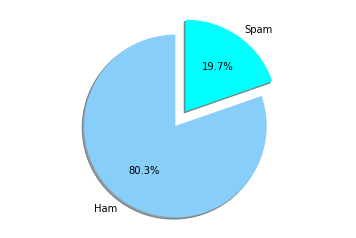

In [11]:
count_Class = pd.value_counts(df.Label, sort = True)

# Data to Plot
labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['lightskyblue', 'aqua']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

# Splitting the Test and Train Data 

In [12]:
train_set, test_set, train_label, test_label = train_test_split(df, df_labels, test_size = 0.30, random_state = 42)
print(train_set.shape)
print(test_set.shape)
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],train_set.shape[1]))

(7000, 2)
(3000, 2)

The Trainset consists of 7000 records and 2 features

The Testset consists of 3000 records and 2 features


# Extracting N-grams from the Text Data

In [13]:
countvect = CountVectorizer(ngram_range = (2,2), )
x_counts = countvect.fit(train_set.Message)

# preparing for training set
x_train_df = countvect.transform(train_set.Message)

# preparing for test set
x_test_df = countvect.transform(test_set.Message)

# Data Model

The Algorithms used below in this notebooks are:

 - Naive Bayes
 - K-Nearest
 - Decision Tree
 - Support Vector Machine
 - Random Forest
 - Logistic Regression 

# Naive Bayes classifier 

The accuracy of Naive Bayes clasifier is 96.73333333333333%

 [[ 484   91]
 [   7 2418]]


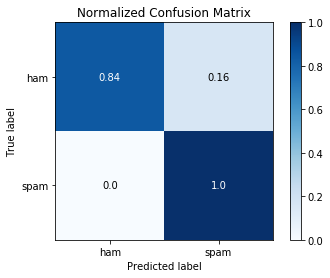

              precision    recall  f1-score   support

         ham       0.99      0.84      0.91       575
        spam       0.96      1.00      0.98      2425

    accuracy                           0.97      3000
   macro avg       0.97      0.92      0.94      3000
weighted avg       0.97      0.97      0.97      3000



In [44]:
clf = MultinomialNB()
clf.fit(x_train_df,train_set.Label)
predicted_values_NB = clf.predict(x_test_df)
predictions = dict()
accuracy = accuracy_score(test_set.Label, predicted_values_NB)
predictions['Naive Bayes'] = accuracy * 100
confusionmatrix = confusion_matrix(test_set.Label, predicted_values_NB)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_NB, normalize = True)
plt.show()
print(classification_report(test_set.Label,predicted_values_NB))
#print(accuracy)

# K-Nearest Neighbors algorithm


['ham' 'ham' 'ham' ... 'spam' 'ham' 'ham']

The accuracy of K-Nearest Neighbors algorithm is 41.6%

 [[ 564   11]
 [1741  684]]


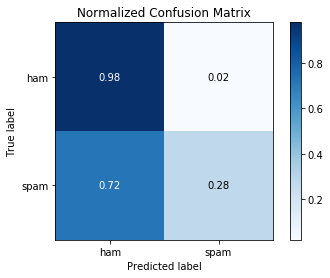

              precision    recall  f1-score   support

         ham       0.24      0.98      0.39       575
        spam       0.98      0.28      0.44      2425

    accuracy                           0.42      3000
   macro avg       0.61      0.63      0.42      3000
weighted avg       0.84      0.42      0.43      3000



In [43]:
#KNN = KNeighborsClassifier(metric = 'euclidean')
KNN = KNeighborsClassifier()
KNN.fit(x_train_df, train_set.Label)
predicted_values_KNN = KNN.predict(x_test_df)
print(predicted_values_KNN)
accuracy_KNN = accuracy_score(test_set.Label, predicted_values_KNN)
predictions['K-Nearest Neighbors algorithm'] = accuracy_KNN * 100
print("\nThe accuracy of K-Nearest Neighbors algorithm is {}%".format(accuracy_KNN * 100))
confusion_matrix_KNN = confusion_matrix(test_set.Label, predicted_values_KNN)
print("\n", confusion_matrix_KNN)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_KNN, normalize = True)
plt.show()
print(classification_report(test_set.Label,predicted_values_KNN))
#print(accuracy_KNN)

# Decision Tree learning

['spam' 'ham' 'spam' ... 'spam' 'spam' 'ham']

The accuracy of Decision Tree learning is 91.56666666666666%

 [[ 469  106]
 [ 147 2278]]


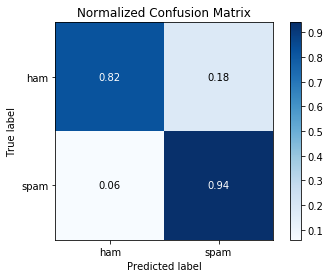

              precision    recall  f1-score   support

         ham       0.76      0.82      0.79       575
        spam       0.96      0.94      0.95      2425

    accuracy                           0.92      3000
   macro avg       0.86      0.88      0.87      3000
weighted avg       0.92      0.92      0.92      3000



In [42]:
from sklearn.metrics import accuracy_score, classification_report
DT = DecisionTreeClassifier()
DT.fit(x_train_df, train_set.Label)
predicted_values_DT = DT.predict(x_test_df)
print(predicted_values_DT)
accuracy_DT = accuracy_score(test_set.Label, predicted_values_DT)
predictions['Decision Tree learning'] = accuracy_DT * 100
print("\nThe accuracy of Decision Tree learning is {}%".format(accuracy_DT * 100))
confusion_matrix_DT = confusion_matrix(test_set.Label, predicted_values_DT)
print("\n", confusion_matrix_DT)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_DT, normalize = True)
plt.show()
print(classification_report(test_set.Label,predicted_values_DT))
#print(accuracy_DT)

# Support Vector Machine (SVM)

C:\Users\Jojo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


['spam' 'spam' 'spam' ... 'spam' 'spam' 'spam']

The accuracy of Support Vector Machine (SVM) is 80.83333333333333%

 [[   0  575]
 [   0 2425]]


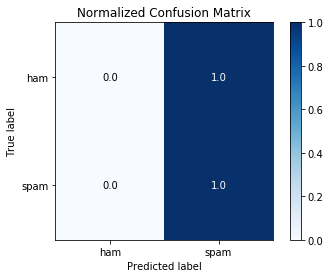

              precision    recall  f1-score   support

         ham       0.00      0.00      0.00       575
        spam       0.81      1.00      0.89      2425

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



C:\Users\Jojo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jojo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jojo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [45]:
SVM = svm.SVC()
SVM.fit(x_train_df, train_set.Label)
predicted_values_SVM = SVM.predict(x_test_df)
print(predicted_values_SVM)
accuracy_SVM = accuracy_score(test_set.Label, predicted_values_SVM)
predictions['Support Vector Machine (SVM)'] = accuracy_SVM * 100
print("\nThe accuracy of Support Vector Machine (SVM) is {}%".format(accuracy_SVM * 100))
confusion_matrix_SVM = confusion_matrix(test_set.Label, predicted_values_SVM)
print("\n", confusion_matrix_SVM)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_SVM, normalize = True)
plt.show()
print(classification_report(test_set.Label,predicted_values_SVM))
#print(accuracy_SVM)

# Random Forest

['spam' 'ham' 'spam' ... 'spam' 'spam' 'ham']

The accuracy of Random Forest is 93.7%

 [[ 486   89]
 [ 100 2325]]


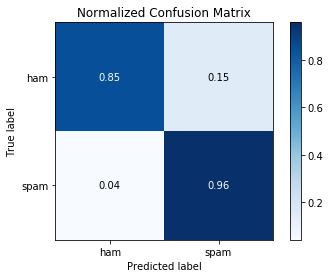

              precision    recall  f1-score   support

         ham       0.83      0.85      0.84       575
        spam       0.96      0.96      0.96      2425

    accuracy                           0.94      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.94      0.94      0.94      3000



In [46]:
RF = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 456)
# n_estimators - количество деревьев в лесе
# oob_score - использовать ли образцы вне примеров для оценки точности обобщения
RF.fit(x_train_df, train_set.Label)
predicted_values_RF = RF.predict(x_test_df)
print(predicted_values_RF)
accuracy_RF = accuracy_score(test_set.Label, predicted_values_RF)
predictions['Random Forest'] = accuracy_RF * 100
print("\nThe accuracy of Random Forest is {}%".format(accuracy_RF * 100))
confusion_matrix_RF = confusion_matrix(test_set.Label, predicted_values_RF)
print("\n", confusion_matrix_RF)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_RF, normalize = True)
plt.show()
print(classification_report(test_set.Label,predicted_values_RF))
#print(accuracy_RF)

C:\Users\Jojo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['spam' 'ham' 'spam' ... 'spam' 'spam' 'ham']

The accuracy of Logistic Regresion is 94.69999999999999%

 [[ 528   47]
 [ 112 2313]]


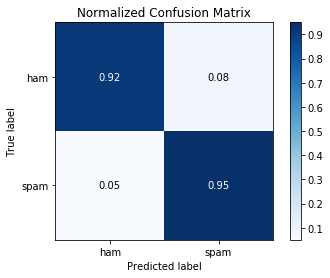

              precision    recall  f1-score   support

         ham       0.82      0.92      0.87       575
        spam       0.98      0.95      0.97      2425

    accuracy                           0.95      3000
   macro avg       0.90      0.94      0.92      3000
weighted avg       0.95      0.95      0.95      3000



In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(x_train_df, train_set.Label)
#prediction['Logistic'] = logreg.predict(x_test_df)

predicted_values_LR=logreg.predict(x_test_df)
print(predicted_values_LR)
accuracy_LR = accuracy_score(test_set.Label, predicted_values_LR)
predictions['Logistic Regresion'] = accuracy_LR * 100
print("\nThe accuracy of Logistic Regresion is {}%".format(accuracy_LR * 100))
confusion_matrix_LR = confusion_matrix(test_set.Label, predicted_values_LR)
print("\n", confusion_matrix_LR)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_LR, normalize = True)
plt.show()
print(classification_report(test_set.Label,predicted_values_LR))
#print(accuracy_LR)

# Method Comparison

,Algorithms,Percentage
0,Naive Bayes,96.733333
1,Support Vector Machine (SVM),80.833333
2,Random Forest,93.700000
3,Logistic Regresion,94.700000


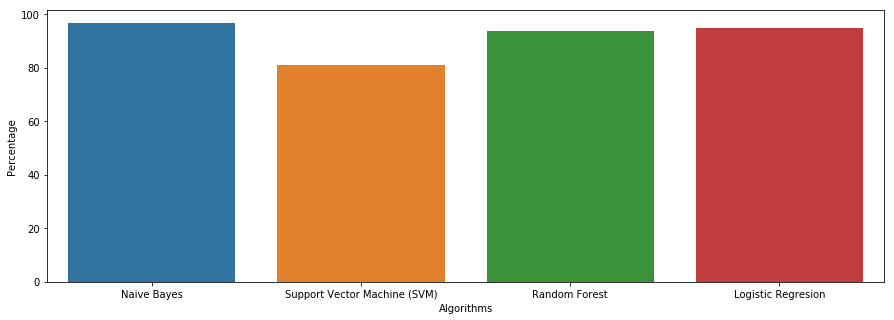

In [51]:
fig, (ax1) = plt.subplots(ncols = 1, sharey = True,figsize = (15,5))
df = pd.DataFrame(list(predictions.items()),columns = ['Algorithms','Percentage'])
display(df)
sns.barplot(x = "Algorithms", y = "Percentage", data = df,ax = ax1);

# ROC Accuracy

In [21]:
#pr, tpr, thresholds = roc_curve(testset.v1,predicted_values_XGB, pos_label=2)
test_prediction = test_set.Label.tolist()
predicted_values = predicted_values_NB.tolist()
test_prediction = [1 if pred=="spam" else 0 for pred in test_prediction]
predicted_values = [1 if pred=="spam" else 0 for pred in predicted_values]
fpr, tpr, thresholds = roc_curve(test_prediction,predicted_values)
roc_auc = auc(fpr, tpr)
print("The ROC Accuracy is {}".format(roc_auc))

The ROC Accuracy is 0.919426266248319


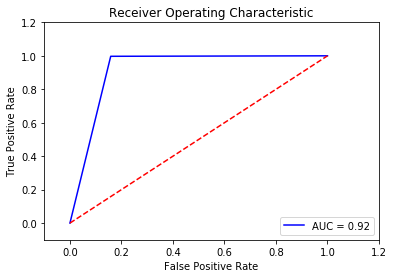

In [22]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()